<a href="https://colab.research.google.com/github/Pankaj-2003/Numerai_Models/blob/main/numerai_first_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q numerapi pandas pyarrow matplotlib lightgbm scikit-learn cloudpickle scipy==1.10.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.9 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

In [ ]:
# Initialize NumerAPI - the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()
all_datasets = napi.list_datasets()

In [ ]:
dataset_versions = list(set([i.split("/")[0] for i in all_datasets]))
dataset_versions

['v4', 'v4.3', 'v4.1', 'v4.2']

In [ ]:
dataset_version = "v4.3"
current_version_files = [i for i in all_datasets if i.startswith(dataset_version)]
current_version_files

['v4.3/features.json',
 'v4.3/live_benchmark_models.parquet',
 'v4.3/live_example_preds.csv',
 'v4.3/live_example_preds.parquet',
 'v4.3/live_int8.parquet',
 'v4.3/meta_model.parquet',
 'v4.3/train_benchmark_models.parquet',
 'v4.3/train_int8.parquet',
 'v4.3/validation_benchmark_models.parquet',
 'v4.3/validation_example_preds.csv',
 'v4.3/validation_example_preds.parquet',
 'v4.3/validation_int8.parquet']

In [ ]:
import json
napi.download_dataset(f"{dataset_version}/features.json");
feature_metadata = json.load(open(f"{dataset_version}/features.json"))


In [ ]:
for i in feature_metadata.keys():
  print(f'{i}: {len(feature_metadata[i])}')


feature_stats: 2376
feature_sets: 17
targets: 41


In [ ]:
features = ["small","medium","all"]
for i in features:
  print(f"{i}:{len(feature_metadata['feature_sets'][i])}")

small:42
medium:705
all:2376


In [ ]:
# loading dataset
import pandas as pd
feature_sets = feature_metadata["feature_sets"]["medium"]
napi.download_dataset(f"{dataset_version}/train_int8.parquet");
train = pd.read_parquet(f"{dataset_version}/train_int8.parquet",columns = ["era","target"] + feature_sets)


In [ ]:
# exploring eras(took just first 10 to get a idea)
train.groupby(["era"]).size()

era
0001    2072
0002    2260
0003    2334
0004    2399
0005    2406
        ... 
0570    4804
0571    4811
0572    4793
0573    4793
0574    4801
Length: 574, dtype: int64

<Axes: title={'center': 'No. of rows per era'}, xlabel='era'>

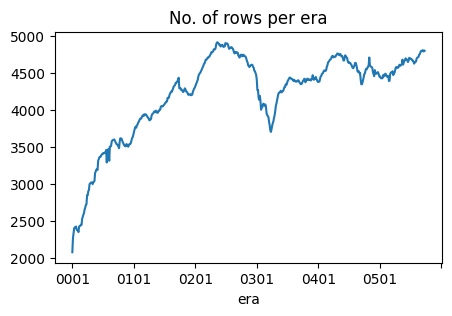

In [ ]:
# no of rows per era
train.groupby('era').size().plot(title = "No. of rows per era",figsize = (5,3),xlabel = "era")